# Train OCR text Detector quick example

In [1]:
import os
import sys
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../../../')
sys.path.append(NOMEROFF_NET_DIR)

from nomeroff_net.text_detectors.base.ocr import OCR

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# auto download latest dataset
from nomeroff_net.tools import modelhub

# auto download latest dataset
info = modelhub.download_dataset_for_model("Eu")
PATH_TO_DATASET = info["dataset_path"]

# local path dataset
#PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/OptionsDetector/numberplate_options_example")

In [5]:
PATH_TO_DATASET

'/var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09'

In [6]:
DATASET_NAME = "eu"
VERSION = "2021_08_30_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [7]:
RESULT_MODEL_PATH

'/var/www/nomeroff-net24/models/anpr_ocr_eu_2021_08_30_pytorch_lightning.ckpt'

In [8]:
class eu(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I",
                        "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
        

        # Train hyperparameters
        self.batch_size = 64
        self.epochs = 50
        self.gpus = 1

In [29]:
ocrTextDetector = eu()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=24)

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'A', 'F', 'C', '2', 'Z', '3', 'K', 'O', 'R', '4', 'S', 'H', '0', '1', 'M', '6', 'D', 'U', 'G', 'P', 'V', 'X', '5', 'L', 'B', '9', '8', 'I', 'N', 'W', 'Q', 'Y', '7', 'J', 'E', 'T'}
Letters val  {'A', 'F', 'C', '2', 'Z', '3', 'K', 'O', 'R', '4', 'S', 'H', '0', '1', 'M', '6', 'D', 'U', 'G', 'P', 'V', 'X', '5', 'L', 'B', '9', '8', 'I', 'N', 'W', 'Q', 'Y', '7', 'J', 'E', 'T'}
Letters test  {'A', 'F', 'C', '2', 'Z', '3', 'K', 'O', 'R', '4', 'S', 'H', '0', '1', 'M', '6', 'D', 'G', 'U', 'P', 'V', 'X', '5', 'L', 'B', '9', '8', 'I', 'N', 'W', 'Q', 'Y', '7', 'J', 'E', 'T'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [21]:
#ocrTextDetector.load(RESULT_MODEL_PATH)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt


Found lr: 0.5011872336272719


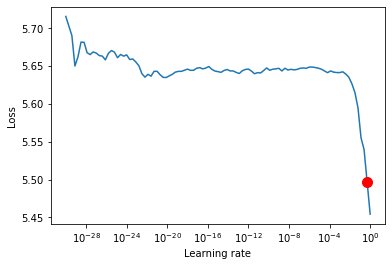

In [31]:
# tune
lr_finder = ocrTextDetector.tune()

# Plot with
fig = lr_finder.plot(suggest=True)
fig.show()

In [32]:
ocrTextDetector.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch    26: reducing learning rate of group 0 to 2.0000e-03.


Epoch    32: reducing learning rate of group 0 to 2.0000e-04.


Epoch    38: reducing learning rate of group 0 to 2.0000e-05.


Epoch    44: reducing learning rate of group 0 to 2.0000e-06.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch    50: reducing learning rate of group 0 to 2.0000e-07.

[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=19-step=4579.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.03485308215022087}
--------------------------------------------------------------------------------


NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [33]:
ocrTextDetector.save(RESULT_MODEL_PATH)

model save to /var/www/nomeroff-net24/models/anpr_ocr_eu_2021_08_30_pytorch_lightning.ckpt


In [34]:
ocrTextDetector.load(RESULT_MODEL_PATH)

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [12]:
ocrTextDetector.test_acc(verbose=True)


[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/259971379.png
Predicted: lhr25662a 			 True: lhr25662

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/260257488.png
Predicted: pmf0231 			 True: pmfo231

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/260250881.png
Predicted: ez672lx 			 True: ez677lx

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/259934574.png
Predicted: de0162 			 True: ceo162

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/260002152.png
Predicted: l04624 			 True: sl04624

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/

0.9815016322089227

In [ ]:
#ocrTextDetector.val_acc(verbose=False)
#ocrTextDetector.train_acc(verbose=False)

## than train with augumentation

In [9]:
class eu(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I",
                        "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]


        # Train hyperparameters
        self.batch_size = 64
        self.epochs = 35
        self.gpus = 1

In [10]:
ocrTextDetector = eu()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True, num_workers=24)

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'F', '4', 'U', '3', 'N', '5', 'T', 'K', 'L', 'P', 'R', 'H', 'E', 'J', 'G', 'V', '2', '7', 'D', 'M', 'Q', 'W', 'C', 'S', '9', 'B', 'X', '0', 'O', '1', '8', '6', 'Z', 'A', 'I', 'Y'}
Letters val  {'F', '4', 'U', '3', 'N', '5', 'K', 'T', 'L', 'P', 'R', 'H', 'E', 'J', 'G', 'V', '2', '7', 'D', 'M', 'Q', 'W', 'C', 'S', '9', 'B', 'X', '0', 'O', '1', '8', '6', 'Z', 'A', 'I', 'Y'}
Letters test  {'F', '4', 'U', '3', 'N', '5', 'T', 'K', 'L', 'P', 'R', 'H', 'E', 'J', 'G', 'V', '2', '7', 'D', 'M', 'Q', 'W', 'C', 'S', '9', 'B', 'X', '0', 'O', '1', '8', '6', 'Z', 'A', 'I', 'Y'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [11]:
#ocrTextDetector.load(RESULT_MODEL_PATH)
ocrTextDetector.load('/var/www/nomeroff-net24/models/anpr_ocr_eu_2021_08_30_pytorch_lightning.ckpt.5')

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [ ]:
for i in range(10,15):
    # tune
    lr_finder = ocrTextDetector.tune()

    # Plot with
    fig = lr_finder.plot(suggest=True)
    fig.show()
    model = ocrTextDetector.train(seed=i)
    ocrTextDetector.test_acc(verbose=True)
    ocrTextDetector.save('{}.{}'.format(RESULT_MODEL_PATH,i))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 10


Found lr: 0.5011872336272719



GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Global seed set to 10


Epoch    32: reducing learning rate of group 0 to 2.0000e-03.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=25-step=5953.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.037477802485227585}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/260257488.png
Predicted: pmf0231 			 True: pmfo231

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/260700540.png
Predicted: ez3020z 			 True: ez302dz

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/260071240.png
Predicted: w143eg 			 True: dw143eg

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/260250881.png
Predicted: ez67lx 			 True: ez677lx

[INFO] /var/www/nomeroff-net24/nomeroff_net/

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


Testing Accuracy:  0.9586507072905331
model save to /var/www/nomeroff-net24/models/anpr_ocr_eu_2021_08_30_pytorch_lightning.ckpt.10


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)
Global seed set to 10


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 11
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719


Global seed set to 11


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /var/www/nomeroff-net24/nomeroff_net/data/logs/ocr/epoch=32-step=7556-v2.ckpt



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.025088179856538773}
--------------------------------------------------------------------------------

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/259971392.png
Predicted: hr25662 			 True: lhr25662

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/259971379.png
Predicted: lhr2562 			 True: lhr25662

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/260257488.png
Predicted: pmf0231 			 True: pmfo231

[INFO] /var/www/nomeroff-net24/nomeroff_net/tools/../../data/./dataset/TextDetector/Eu/autoriaNumberplateOcrEu-2020-10-09/test/img/260700540.png
Predicted: ez302d72 			 True: ez302dz

[INFO] /var/www/nomeroff-net24/nomeroff

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 2.4 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.229    Total estimated model params size (MB)


Testing Accuracy:  0.969532100108814
model save to /var/www/nomeroff-net24/models/anpr_ocr_eu_2021_08_30_pytorch_lightning.ckpt.11


Global seed set to 11


Restored states from the checkpoint file at /var/www/nomeroff-net24/train/lr_find_temp_model.ckpt
Global seed set to 12
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found lr: 0.5011872336272719



Global seed set to 12
